## 규제
- 과대적합을 해결하는 방법
- 데이터들간의 점을 찍으면 데이터 그 자체가 되며 다른 데이터는 정확도와의 차이(오답률)가 더 커지게 된다
![과대적합,과소적합](https://blog.kakaocdn.net/dn/NvnvN/btskaBOB42b/q5vveUVhzPKZpVH3lSNgA0/img.png)
- 과소fit, fit, 과대fit

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [51]:
df = pd.read_csv('data/Fish.csv')
perch_df = df.loc[df['Species'] == 'Perch']
perch_full = perch_df[['Length2', 'Height', 'Width']]
perch_weight = perch_df[['Weight']]
from sklearn.model_selection import train_test_split

x_input, y_input, x_target, y_target = train_test_split(perch_full, perch_weight)

poly = PolynomialFeatures(include_bias=False)

In [29]:
poly.fit([[3, 5]])
poly.transform([[3, 5]])

array([[ 3.,  5.,  9., 15., 25.]])

In [30]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_input)
x_poly = poly.transform(x_input)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_poly, x_target) # 특성을 기반으로 x_target(무게)를 찾는다
lr.score(x_poly, x_target)
y_poly = poly.transform(y_input)

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_poly)

train_scaled = ss.transform(x_poly)
test_scaled = ss.transform(y_poly)

### 릿지(ridge)
- 계수를 제곱한 값을 기준으로 규제를 적용한다

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, x_target)

print(ridge.score(train_scaled, x_target))
print(ridge.score(test_scaled, y_target))
# 필요없다고 생각되는 컬럼을 제거(?)하는 과정

0.9855770519780835
0.9846284871464777


- 규제의 강도를 정할 수 있다
- ridge = Ridge(alpha=1) 알파값에 변동을 줌으로써 강도를 정하고,
- 알파의 최적값도 찾을 수 있고 찾아야 한다
- train과 test가 가장 근접하게 하는 알파값이 좋음

### 라쏘(lasso)
- |a|x 처럼 절대값을 기준으로 규제를 적용한다

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, x_target)

print(lasso.score(train_scaled, x_target))
print(lasso.score(test_scaled, y_target))

0.9868611302301901
0.9843526126346485


C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.974e+02, tolerance: 4.851e+02
  model = cd_fast.enet_coordinate_descent(


라쏘도 알파값으로 강도조절 가능

In [54]:
X = df[['Length1']].values  # 특성 (길이)
y = df['Weight'].values     # 목표값 (무게)

# 데이터 정렬 (시각화를 위해 필요)
sorted_idx = np.argsort(X[:, 0])
X = X[sorted_idx]
y = y[sorted_idx]

In [61]:
degree = 3
alpha = 0.1

# 다항 회귀 + Lasso 파이프라인 생성
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=alpha, max_iter=10000))

# 모델 학습
model.fit(X, y)

# 예측값 계산
y_pred = model.predict(X)


Text(0.5, 1.0, 'Polynomial Regression with Lasso (Degree=3, Alpha=0.1)')

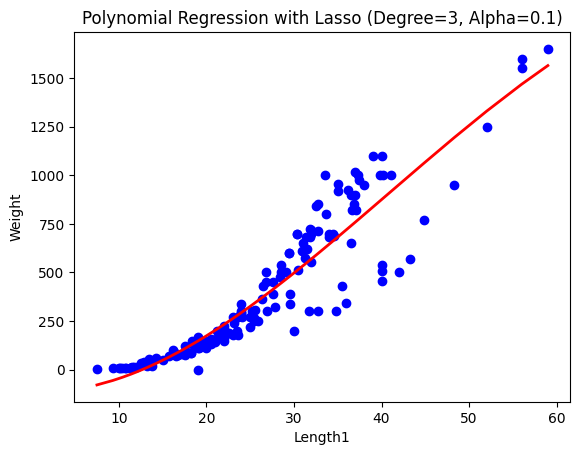

In [60]:
plt.scatter(X, y, color='blue', label='Actual Data')  # 원본 데이터 산점도
plt.plot(X, y_pred, color='red', linewidth=2, label='Lasso Polynomial Regression')  # 예측 곡선
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title(f'Polynomial Regression with Lasso (Degree={degree}, Alpha={alpha})')